In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
obesity_df = pd.read_csv("obesity-cleaned.csv")

In [3]:
obesity_df.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [29]:
obesity_table = obesity_df.to_html()

In [31]:
print(obesity_table)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>Year</th>
      <th>Obesity_percentage</th>
      <th>Sex</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Afghanistan</td>
      <td>1975</td>
      <td>0.5</td>
      <td>Both sexes</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Afghanistan</td>
      <td>1975</td>
      <td>0.2</td>
      <td>Male</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Afghanistan</td>
      <td>1975</td>
      <td>0.8</td>
      <td>Female</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Afghanistan</td>
      <td>1976</td>
      <td>0.5</td>
      <td>Both sexes</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Afghanistan</td>
      <td>1976</td>
      <td>0.2</td>
      <td>Male</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Afghanistan</td>
      <td>1976</td>
      <td>0.8</td>
      <td>Female</td>
    </tr>
    <tr>
      <th>6</th>


In [4]:
obesity_df.isnull().sum()

Unnamed: 0     0
Country        0
Year           0
Obesity (%)    0
Sex            0
dtype: int64

In [5]:
obesity_df = obesity_df.drop(columns=['Unnamed: 0'])

In [6]:
obesity_df.rename(columns={'Obesity (%)' : 'Obesity_percentage'}, inplace=True)

In [7]:
obesity_df['Obesity_percentage'] = obesity_df['Obesity_percentage'].apply(lambda x: (x.split()[0]))

In [8]:
clean_df = obesity_df[obesity_df["Obesity_percentage"] != "No"]

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             24066 non-null  object
 1   Year                24066 non-null  int64 
 2   Obesity_percentage  24066 non-null  object
 3   Sex                 24066 non-null  object
dtypes: int64(1), object(3)
memory usage: 940.1+ KB


In [10]:
clean_df['Obesity_percentage'] = clean_df['Obesity_percentage'].apply(lambda x: float(x))

In [11]:
clean_df.head()

,Country,Year,Obesity_percentage,Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male


In [12]:
#create df with average obesity across all years and both sexes that is organized by country
both_by_country = clean_df[clean_df['Sex'] == 'Both sexes'].groupby("Country").Obesity_percentage.mean()

In [13]:
#descending order 
top_10 = both_by_country.sort_values(ascending=False)

In [14]:
#constrain to get a top 10 
top_10_obesity = pd.DataFrame(top_10)

In [15]:
top_10_obesity.reset_index(inplace=True)

In [16]:
top_10_ranking = top_10_obesity.head(10)

In [17]:
#repeat process for males and females individually 
males_by_country = clean_df[clean_df['Sex'] == 'Male'].groupby("Country").Obesity_percentage.mean()
top_10 = males_by_country.sort_values(ascending=False)
top_10_male_obesity = pd.DataFrame(top_10)
top_10_male_obesity.reset_index(inplace=True)
top_10_male_ranking = top_10_male_obesity.head(10)

In [18]:
females_by_country = clean_df[clean_df['Sex'] == 'Female'].groupby("Country").Obesity_percentage.mean()
top_10 = females_by_country.sort_values(ascending=False)
top_10_female_obesity = pd.DataFrame(top_10)
top_10_female_obesity.reset_index(inplace=True)
top_10_female_ranking = top_10_female_obesity.head(10)

Text(0, 0.5, 'Obesity (%)')

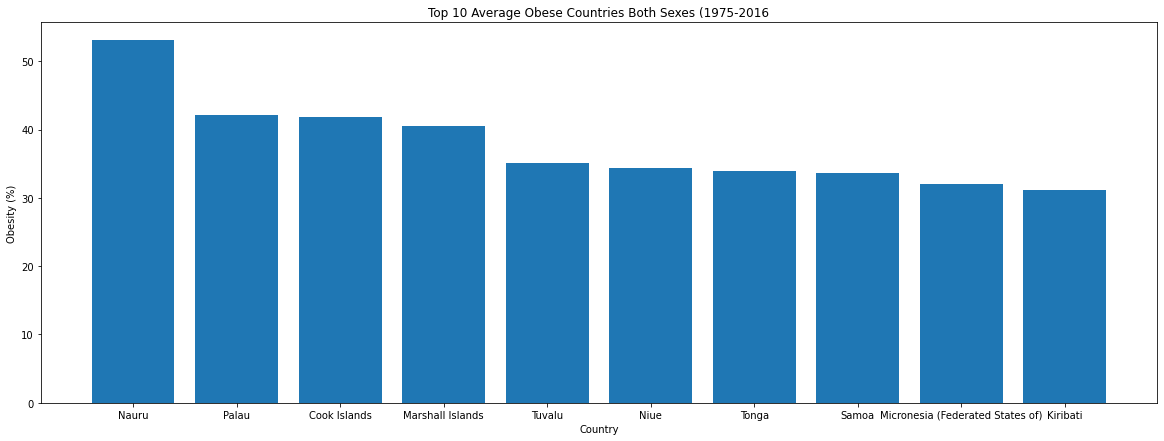

In [19]:
#plot top 10 average obesity between 1975-2016 for both sexes 
plt.figure(figsize=(20,7))
plt.bar(top_10_ranking['Country'], top_10_ranking['Obesity_percentage'])
plt.title("Top 10 Average Obese Countries Both Sexes (1975-2016")
plt.xlabel("Country")
plt.ylabel("Obesity (%)")

Text(0, 0.5, 'Obesity (%)')

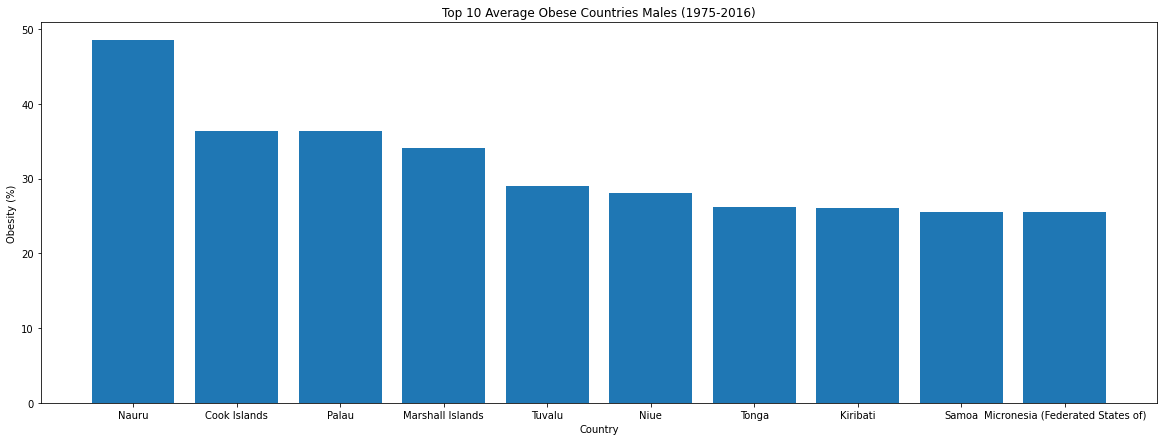

In [20]:
#plot top 10 average obesity between 1975 - 2016 for Males 
plt.figure(figsize=(20,7))
plt.bar(top_10_male_ranking['Country'], top_10_male_ranking['Obesity_percentage'])
plt.title("Top 10 Average Obese Countries Males (1975-2016)")
plt.xlabel("Country")
plt.ylabel("Obesity (%)")

Text(0, 0.5, 'Obesity (%)')

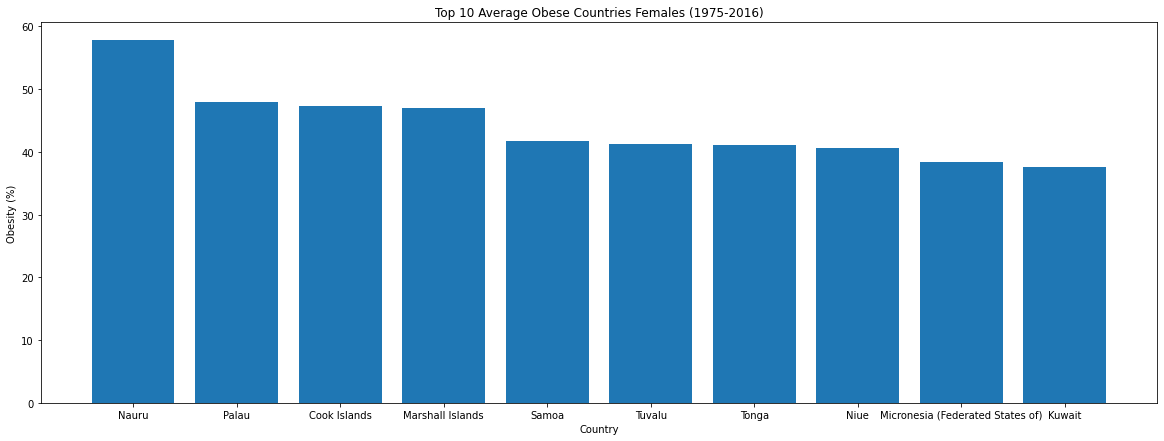

In [76]:
#plot top 10 average obesity between 1975 - 2016 for Females
plt.figure(figsize=(20,7))
plt.bar(top_10_female_ranking['Country'], top_10_female_ranking['Obesity_percentage'])
plt.title("Top 10 Average Obese Countries Females (1975-2016)")
plt.xlabel("Country") 
plt.ylabel("Obesity (%)")

In [22]:
both_sexes = clean_df[clean_df['Sex'] == 'Both sexes'].groupby("Year").Obesity_percentage.mean()

In [23]:
both_sexes

Year
1975     6.510995
1976     6.737696
1977     6.962304
1978     7.193717
1979     7.430890
1980     7.676440
1981     7.923560
1982     8.181152
1983     8.434031
1984     8.709948
1985     8.979581
1986     9.256021
1987     9.537696
1988     9.828272
1989    10.114660
1990    10.414660
1991    10.716230
1992    11.018325
1993    11.319895
1994    11.625654
1995    11.935602
1996    12.260733
1997    12.583246
1998    12.914136
1999    13.256021
2000    13.596859
2001    13.937696
2002    14.283770
2003    14.642932
2004    15.015707
2005    15.379058
2006    15.751832
2007    16.150785
2008    16.542408
2009    16.939267
2010    17.349215
2011    17.763874
2012    18.178534
2013    18.609424
2014    19.043979
2015    19.508377
2016    19.960733
Name: Obesity_percentage, dtype: float64

In [25]:
male = clean_df[clean_df['Sex'] == 'Male'].groupby("Year").Obesity_percentage.mean()
female = clean_df[clean_df['Sex'] == 'Female'].groupby("Year").Obesity_percentage.mean()

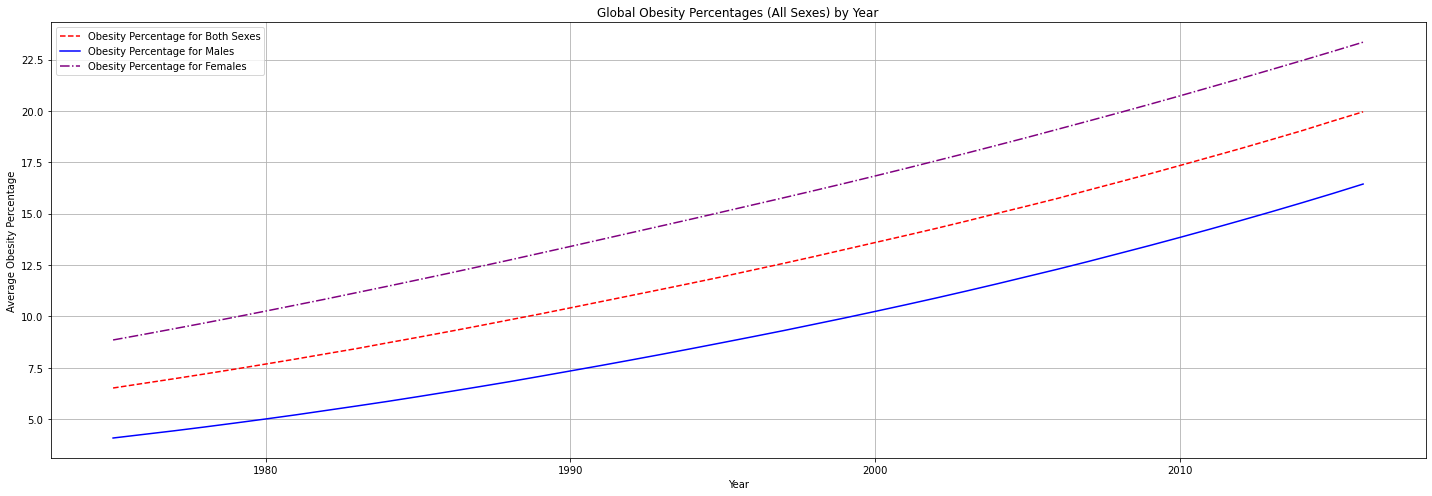

In [26]:
plt.figure(figsize=(20,7))
plt.plot(both_sexes, linestyle='dashed', color="red", label="Obesity Percentage for Both Sexes")
plt.plot(male, linestyle="solid", color="blue", label="Obesity Percentage for Males")
plt.plot(female, linestyle="dashdot", color="purple", label="Obesity Percentage for Females")
plt.legend()
plt.title("Global Obesity Percentages (All Sexes) by Year")
plt.xlabel("Year")
plt.ylabel("Average Obesity Percentage")
plt.grid(True)
plt.tight_layout()

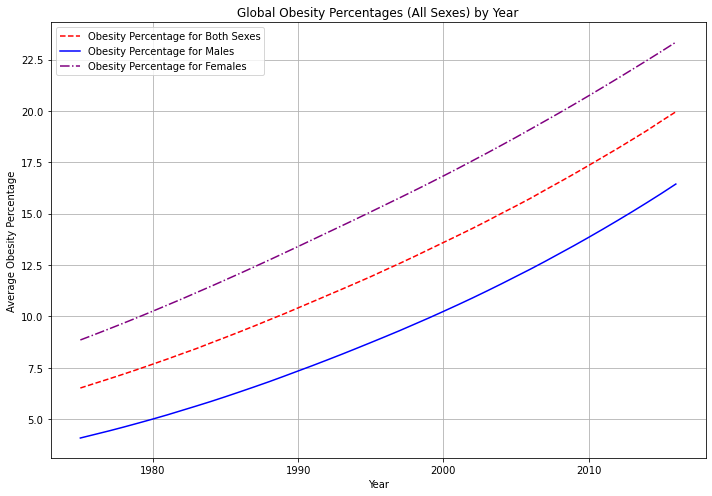

In [27]:
plt.figure(figsize=(10,7))
plt.plot(both_sexes, linestyle='dashed', color="red", label="Obesity Percentage for Both Sexes")
plt.plot(male, linestyle="solid", color="blue", label="Obesity Percentage for Males")
plt.plot(female, linestyle="dashdot", color="purple", label="Obesity Percentage for Females")
plt.legend()
plt.title("Global Obesity Percentages (All Sexes) by Year")
plt.xlabel("Year")
plt.ylabel("Average Obesity Percentage")
plt.grid(True)
plt.tight_layout()

In [77]:
clean_df.head()

,Country,Year,Obesity_percentage,Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male


In [85]:
Us_obesity = clean_df[clean_df['Country'] == "United States of America"].groupby("Year").Obesity_percentage.mean()

In [86]:
Us_obesity.head()

Year
1975    11.833333
1976    12.166667
1977    12.533333
1978    12.933333
1979    13.266667
Name: Obesity_percentage, dtype: float64

In [89]:
US_df = pd.DataFrame(Us_obesity)

In [91]:
US_df.head(5)

,Obesity_percentage
Year,
1975,11.833333
1976,12.166667
1977,12.533333
1978,12.933333
1979,13.266667


In [97]:
Percent_change = US_df.pct_change(fill_method="ffill")
print(Percent_change)

Obesity_percentage
Year                    
1975                 NaN
1976            0.028169
1977            0.030137
1978            0.031915
1979            0.025773
1980            0.030151
1981            0.029268
1982            0.030806
1983            0.032184
1984            0.028953
1985            0.032468
1986            0.031447
1987            0.032520
1988            0.031496
1989            0.032443
1990            0.033272
1991            0.032200
1992            0.032929
1993            0.031879
1994            0.032520
1995            0.033071
1996            0.032012
1997            0.032496
1998            0.031474
1999            0.030513
2000            0.028264
2001            0.028796
2002            0.026718
2003            0.026022
2004            0.025362
2005            0.023557
2006            0.024166
2007            0.021348
2008            0.022002
2009            0.021529
2010            0.020021
2011            0.020661
2012            0.019231
2013  

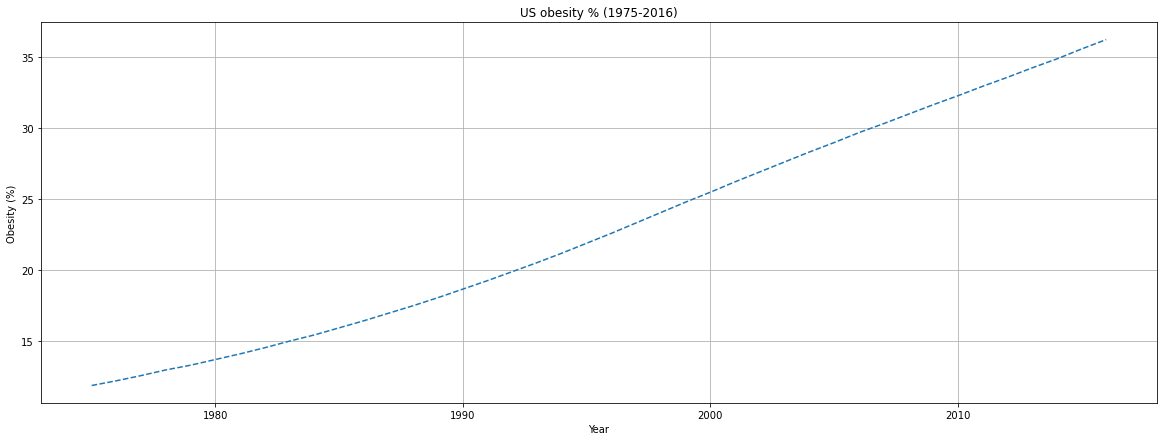

In [88]:
#plot US obesity over time 
plt.figure(figsize=(20,7))
plt.plot(Us_obesity, linestyle = "dashed")
plt.title("US obesity % (1975-2016)")
plt.xlabel("Year")
plt.ylabel("Obesity (%)")
plt.grid(True)

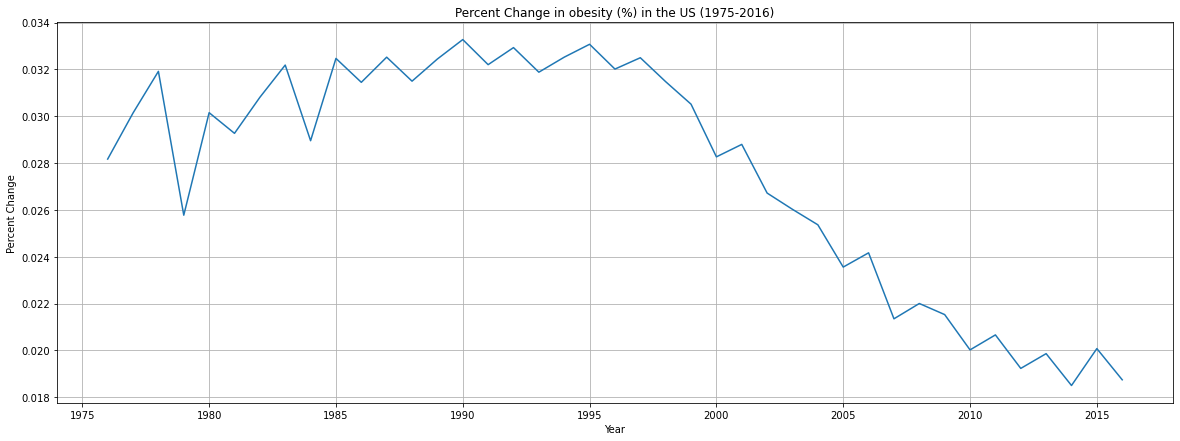

In [99]:
plt.figure(figsize=(20,7))
plt.plot(Percent_change, linestyle="solid")
plt.title("Percent Change in obesity (%) in the US (1975-2016)")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)